# Análisis Descriptivo y Exploratorio de Datos - Laboratorio

**Autor**: *Roger Sans i Prats*  
**Archivo utilizado**: `liver_disease.csv`

---

## Introducción

Un Grupo Hospitalario, comprometido con la mejora continua en la atención médica, ha detectado una problemática creciente relacionada con la mortalidad por **cirrosis hepática**, atribuida al incremento en el consumo de alcohol, infecciones crónicas por hepatitis y enfermedades hepáticas vinculadas a la obesidad. Para apoyar el proceso de diagnóstico y tratamiento, se propone un análisis estadístico detallado que permita comprender las características de los datos clínicos disponibles.

## Objetivo del notebook

Este notebook tiene como finalidad realizar un **análisis descriptivo y exploratorio** del conjunto de datos `liver_disease.csv`, que contiene información sobre pacientes con enfermedades hepáticas. A través de herramientas estadísticas, se busca:

- Evaluar medidas de dispersión en variables seleccionadas.
- Analizar la forma y simetría de diversas distribuciones mediante histogramas.
- Identificar valores atípicos a través de diagramas de caja.
- Explorar las relaciones entre variables mediante una matriz de correlación.

El objetivo final es interpretar los resultados desde una perspectiva clínica y estadística, brindando aportes relevantes al contexto de la atención médica.

---

## Contenido del análisis

1. **Medidas de dispersión**: Media, desviación estándar, varianza, rango y rango intercuartílico de las variables *TB* y *DB*.
2. **Caracterización de distribuciones**: Histogramas de las variables *TB*, *DB*, *Alkphos* y *Sgpt*.
3. **Valores atípicos**: Boxplots para *Sgot*, *TP*, *ALB* y *A/G Ratio*.
4. **Correlación entre variables**: Análisis de la matriz de correlación y discusión de relaciones significativas.

---



In [68]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
df = pd.read_csv("liver_disease.csv")

# Vista previa del dataframe
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


1. **Medidas de dispersión**. Se calcula la media, desviación estándar, varianza, rango y rango intercuartílico de las variables TB y DB. Se discuten las implicaciones de estos valores respecto a la variabilidad de cada variable.

In [71]:
# Seleccionamos nuestras variables
variables = ['TB', 'DB']

# Creamos una tabla con las variables en filas y las medidas estadísticas en columnas
dispersion_stats = pd.DataFrame({
    'Media': df[variables].mean(),
    'Desviación estándar': df[variables].std(),
    'Varianza': df[variables].var(),
    'Rango': df[variables].max() - df[variables].min(),
    'Rango intercuartílico': df[variables].quantile(0.75) - df[variables].quantile(0.25)
})

# Visualizamos la tabla
dispersion_stats


,Media,Desviación estándar,Varianza,Rango,Rango intercuartílico
TB,3.298799,6.209522,38.558160,74.6,1.8
DB,1.486106,2.808498,7.887659,19.6,1.1


## Análisis de medidas de dispersión para TB y DB

Como podemos observar en los resultados de las medidas de dispersión obtenidas para las variables TB (Bilirrubina Total) y DB (Bilirrubina Directa, muestran que existe una **alta variabilidad** en ambas. Aunque, si observamos la variable TB, esta presenta valores más amplios en todos los indicadores, lo cual nos sugiere **una mayor dispersión en los niveles de bilirrubina total.**

Si hacemos un análisis más exhaustivo de las medidas estadísticas, podemos observar que en ambas variables el valor de la media es un número relativamente bajo (entendiendo que dicho valor no puede ser negativo), pero en cambio el rango presenta un valor muy elevado, lo cual ya nos señala que **pueden existir valores atípicos sobretodo acercandonos a los valores máximos de dichas variables.**

Haciendo hincapié en la desviación estándar, notamos que **TB** presenta un valor más del doble que **DB**, lo que refuerza la idea de que los valores de bilirrubina total están más dispersos con respecto a su media. 

Asimismo, al comparar la **varianza**, que es simplemente la desviación estándar al cuadrado, encontramos (evidentemente) una diferencia aún más marcada: 38.55 para TB frente a 7.88 para DB. Esto confirma que la variabilidad en TB no solo es más alta, sino que puede influir de manera significativa en cualquier análisis que incluya esta variable sin un tratamiento previo.

Por último, el **rango intercuartílico (IQR)**, menos sensible a valores atípicos, confirma que la mayoría de los pacientes tienen niveles de bilirrubina directa más concentrados que los de bilirrubina total, lo que es clínicamente esperable ya que la bilirrubina directa es una fracción de la total. La bilirrubina total se obtiene de sumar los valores bilirrubina directa e indirecta.

En resumen, el comportamiento más disperso de TB podría indicar que es una variable más sensible a alteraciones clínicas y que su análisis requiere mayor atención frente a valores extremos.

## 2. **Caracterización de distribuciones**: Histogramas de las variables *TB*, *DB*, *Alkphos* y *Sgpt*.

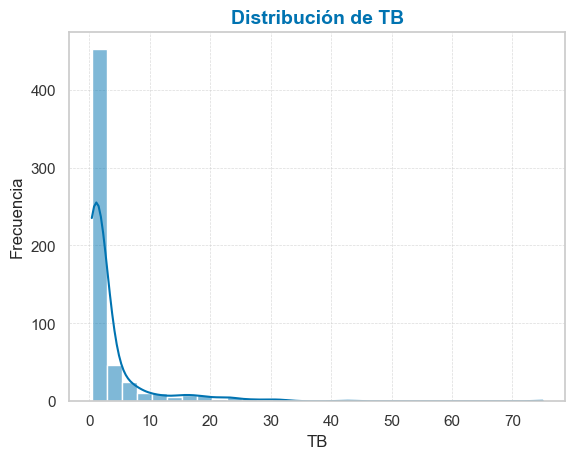

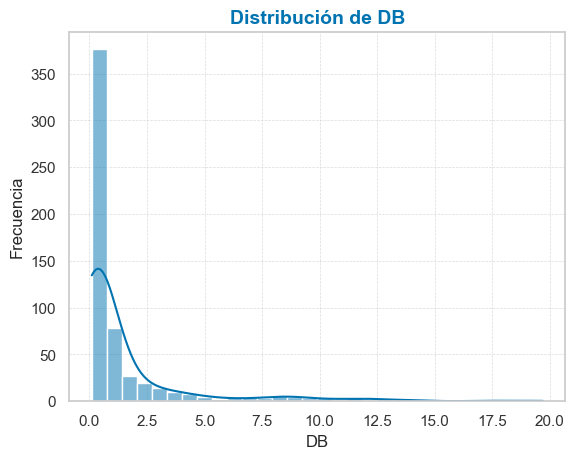

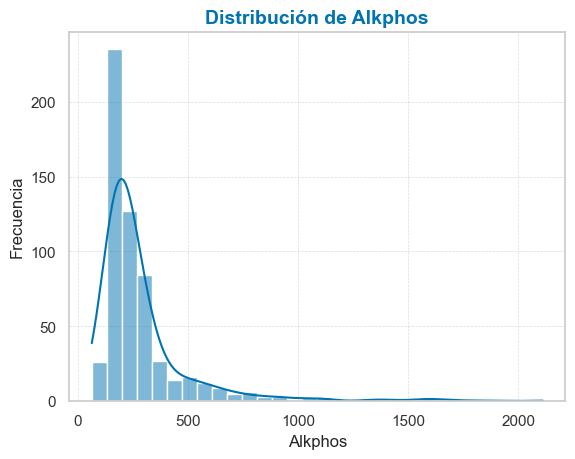

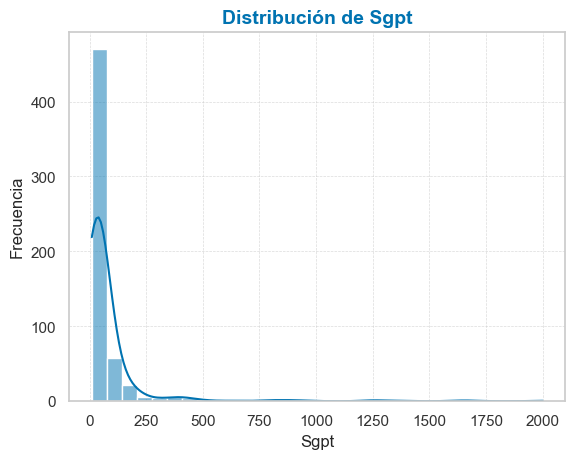

In [75]:
# Seleccionamos nuestras variables
variables_histograma = ['TB', 'DB', 'Alkphos', 'Sgpt']

# Creamos el histograma
for var in variables_histograma:
    plt.figure()
    sns.histplot(df[var], kde=True, bins=30, color="#0073b1")  # Azul corporativo
    plt.title(f'Distribución de {var}', fontsize=14, fontweight='bold', color='#0073b1')
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xticks(color='#333333')
    plt.yticks(color='#333333')
    plt.show()


### Interpretación de los histogramas

Los histogramas no solo muestran cómo se distribuyen estadísticamente las variables, sino que también ofrecen pistas clínicas sobre el comportamiento de las funciones hepáticas representadas.

- **TB y DB**

Las gráficas de **Bilirrubina Total (TB)** y **Bilirrubina Directa (DB)** tienen una forma bastante parecida: ambas están fuertemente sesgadas hacia la derecha, con muchos valores agrupados cerca de cero y una larga cola que se extiende hacia cifras más altas. Esto encaja con lo que se esperaría clínicamente, ya que la bilirrubina total incluye tanto la fracción directa (conjugada) como la indirecta (no conjugada). Estos marcadores reflejan cómo el hígado procesa y elimina la bilirrubina, un subproducto de la degradación de la hemoglobina. Cuando sus niveles se elevan, suele ser señal de problemas como **ictericia, disfunción hepática o alguna obstrucción biliar**.

Al mirar más de cerca, la **TB** puede alcanzar valores superiores a 70, lo que indica casos graves donde probablemente hay una combinación de daño hepático y bloqueo de vías biliares. En contraste, la **DB** también puede estar elevada, pero no sobrepasa los 20, algo lógico considerando que representa solo una parte de la bilirrubina total. Su elevación suele ser más contenida.

La marcada asimetría en ambas variables sugiere que podrían requerirse **transformaciones estadísticas** si se van a usar en modelos que asumen normalidad. Además, estas formas apuntan a que existe un grupo específico de pacientes con **condiciones clínicas relevantes** que distorsionan las distribuciones generales.

- **Alkphos**

En el caso de **Alkphos (Fosfatasa Alcalina)**, el patrón también es marcadamente asimétrico hacia la derecha. La mayoría de los valores se concentran entre 50 y 300, aunque hay casos que superan ampliamente los 2000. Esta enzima suele elevarse en situaciones como **obstrucciones biliares, infiltración hepática o ciertas patologías óseas**. Lo que sugiere el histograma es que, aunque la mayoría presenta valores dentro del rango esperado, hay un pequeño grupo de pacientes con **valores anormalmente altos** que podrían estar enfrentando complicaciones serias a nivel hepático.

Dado ese comportamiento, sería recomendable aplicar alguna transformación (por ejemplo, logarítmica) o considerar técnicas estadísticas robustas si se pretende usar esta variable en modelos de predicción.

- **Sgpt**

Por último, **Sgpt (ALT)** —una enzima que se libera cuando hay daño en las células del hígado— muestra una distribución similar a las anteriores: **positivamente sesgada**, con muchos valores bajos y algunos casos extremos que se acercan a los 2000. En general, se observa una gran cantidad de pacientes con niveles entre 0 y 100, lo que podría reflejar un funcionamiento hepático normal o alteraciones leves. Sin embargo, ese pequeño grupo con cifras elevadas podría estar atravesando cuadros como **hepatitis, cirrosis o enfermedades hepáticas de tipo metabólico**.

Tal como ocurre con las otras variables, esta forma de distribución sugiere que conviene transformar la variable antes de incluirla en análisis estadísticos clásicos. También sería interesante revisar en profundidad a los pacientes con valores más extremos, ya que podrían ofrecer información valiosa desde el punto de vista clínico.

## 3. **Valores atípicos**: Boxplots para *Sgot*, *TP*, *ALB* y *A/G Ratio*.

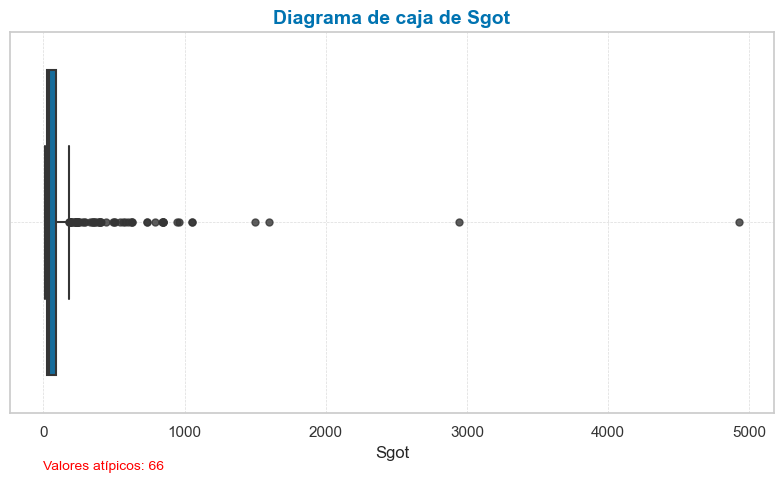

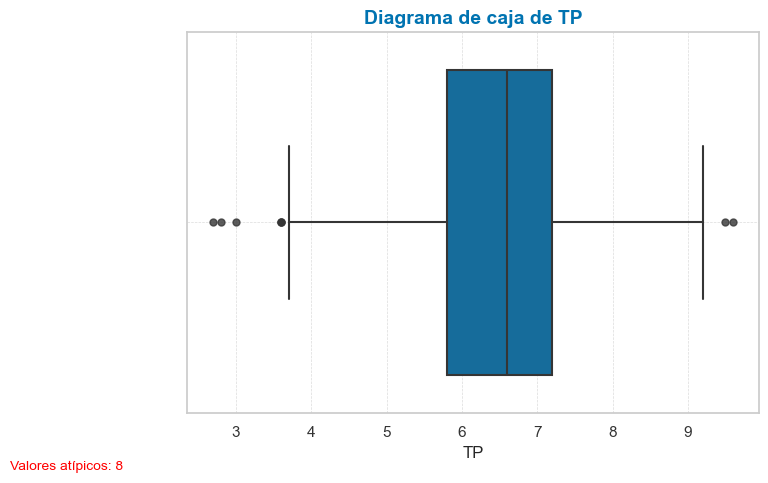

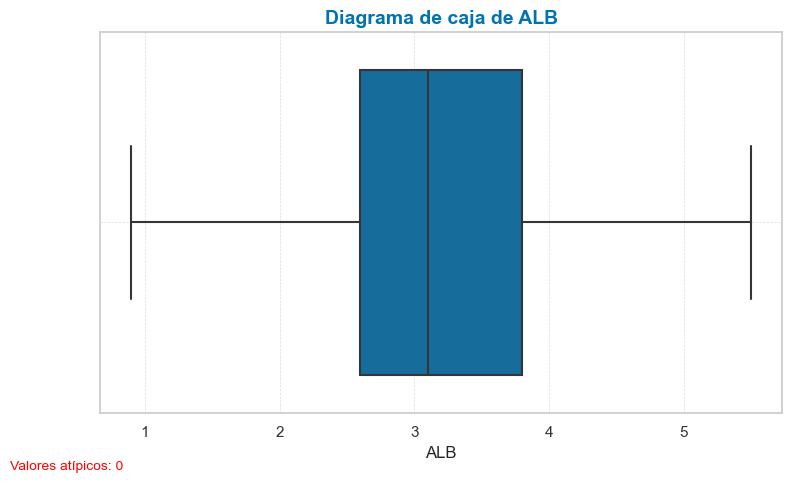

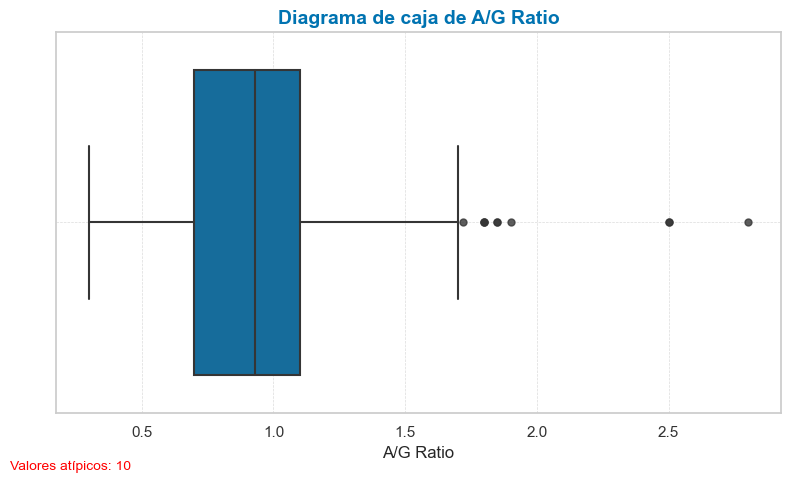

In [117]:
# Seleccionamos nuestras variables
variables_boxplot = ['Sgot', 'TP', 'ALB', 'A/G Ratio']

# Generamos los boxplots
for var in variables_boxplot:
    plt.figure(figsize=(8, 5))

    ax = sns.boxplot(
        x=df[var],
        color="#0073b1",
        fliersize=5,
        flierprops=dict(marker='o', color='black', alpha=0.8)
    )

    # Calculamos los outliers
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    n_outliers = outliers.shape[0]

    # Personalizamos el gráfico
    plt.title(f'Diagrama de caja de {var}', fontsize=14, fontweight='bold', color='#0073b1')
    plt.xlabel(var, fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xticks(color='#333333')
    
    ax.annotate(
        f'Valores atípicos: {n_outliers}',
        xy=(0, -0.15),
        xycoords=('data', 'axes fraction'),
        ha='left',
        fontsize=10,
        color='red'
    )

    plt.tight_layout()
    plt.show()


## Interpretación de los boxplots

Esta herramienta visual permite identificar rápidamente si hay datos que se alejan del rango habitual.

- **Sgot (AST, aspartato aminotransferasa)**

Esta encima participa en el proceso de metabolización de los aminoácidos, el cual es un proceso fundamental para el ciclo de la urea. En el boxplot de **Sgot** se aprecia claramente una gran cantidad de valores fuera del rango habitual. La mayoría de los datos están concentrados en la parte baja del eje, pero hay muchos puntos dispersos hacia la derecha, esto sugiere que hay pacientes con niveles anormalmente altos de esta enzima, lo cual podría relacionarse con **daño hepático agudo, necrosis celular** u otros procesos inflamatorios. En total, se detectaron **66 observaciones fuera del rango esperado**. Este tipo de distribución suele darse cuando la variable es sensible a casos clínicos extremos. En este caso, valores tan altos de Sgot pueden estar reflejando daño importante en el hígado, aunque también podrían deberse a afectaciones musculares (por ejemplo después de un entrenamiento de intensidad excesivamente alta) u otras condiciones. La mediana se mantiene baja, lo cual confirma que estos casos extremos no representan a la mayoría, pero aun así son relevantes porque pueden influir bastante en el análisis si no se controlan.

En resumen, Sgot muestra una dispersión bastante amplia, y los valores atípicos son numerosos. Si se quisiera usar esta variable para un modelo o análisis comparativo, sería recomendable transformarla o tratar los extremos por separado.

- **TP (Tiempo de protrombina)**:

Esta variable nos mide el tiempo en segundos que tarda  la sangre en formar un coágulo después de aplicarle ciertos reactivos. La caja central es simétrica y la mayoría de los valores se agrupan cerca de la mediana, que está en torno a 6.5. Esto indica que el tiempo de protrombina en general es bastante estable entre los pacientes del conjunto de datos. Aunque como bien hemos comentado, su distribución es un poco más equilibrada en comparación con otras variables, también aparecen algunos valores elevados fuera del rango. Por un lado, unos pocos pacientes tienen un TP más bajo de lo normal, y por otro, también se identifican algunos con tiempos más prolongados. Esto podría deberse a **problemas en la coagulación o insuficiencia hepática**. Se encontraron **8 casos atípicos**.

Aunque hay outliers, la cantidad no es muy alta y no parecen distorsionar la forma general de la variable. De hecho, TP es una de las variables más consistentes visualmente dentro del grupo analizado.

- **ALB (Albúmina)**:

Es la proteina plasmática más producida por el hígado. El boxplot de la albúmina muestra una distribución muy estable. **No hay valores atípicos**, lo que significa que todos los datos están dentro del rango esperado. La mediana está bien centrada, y los límites del gráfico abarcan sin problema la mayoría de los casos. Esto puede indicar que los pacientes tienen niveles de albúmina bastante parecidos entre sí, lo cual es una buena señal en términos de consistencia. Aunque no haya outliers, eso no quiere decir que no tenga valor clínico. Si los niveles de albúmina estuvieran sistemáticamente bajos, podría hablarse de problemas hepáticos o nutricionales, pero en este caso parece que los valores se mantienen dentro de un rango razonable.

- **A/G Ratio (Relación albúmina/globulina)**:

Este ratio nos compara la presencia de albúmina frente a la globulinas. El gráfico de A/G Ratio muestra una distribución bastante compacta, aunque sí aparecen algunos valores atípicos en el extremo derecho. En total se detectan 10 casos fuera del rango considerado normal. La mayor parte de **los datos se concentra en torno a 1, que es lo esperable en personas sanas.** Sin embargo, los valores por encima de 2 podrían estar reflejando desequilibrios en las proteínas del plasma, como una reducción de globulinas o aumento de albúmina. Aunque no es común, este tipo de variación puede ocurrir en ciertos trastornos hepáticos o inmunológicos. En general, el comportamiento de esta variable es bastante estable, pero los outliers (10) podrían ser útiles para identificar perfiles clínicos específicos. Sería interesante analizar si esos casos coinciden con otros indicadores alterados en el dataset.

## 4. **Correlación entre variables**: Análisis de la matriz de correlación y discusión de relaciones significativas.

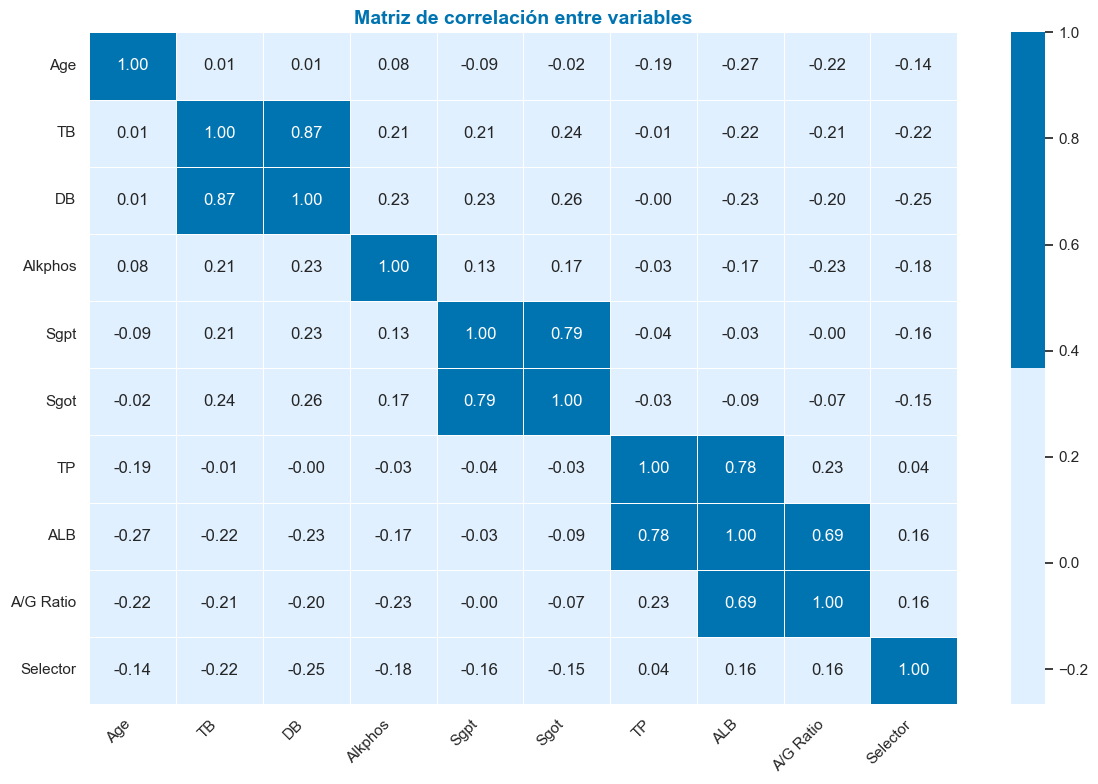

In [110]:
# Generamos la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# La visualizamos en un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap=sns.color_palette(["#e0f0ff", "#0073b1"], as_cmap=True),
    linewidths=0.5,
    linecolor='white'
)
plt.title("Matriz de correlación entre variables", fontsize=14, fontweight='bold', color="#0073b1")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Análisis de la matriz de correlación

A partir de la matriz obtenida, se pueden detectar algunas relaciones claras entre variables, así como otras que apenas muestran asociación.

La **correlación más fuerte** del conjunto es entre **TB y DB**, con un valor de 0.87. Esto era de esperar, ya que, como bien hemos mencionado anteriormente, la bilirrubina directa forma parte de la bilirrubina total. Esta relación alta nos dice que ambas variables miden aspectos muy relacionados del mismo fenómeno, por lo que su comportamiento tiende a ser casi paralelo.

Otra correlación fuerte, aunque no tan alta, es la de **Sgpt y Sgot**, que tienen un valor de 0.79. Estas enzimas hepáticas suelen elevarse juntas cuando hay daño en el hígado, así que su comportamiento coordinado tiene sentido desde el punto de vista clínico.

También se observa una correlación interesante entre **TP y ALB**, con un valor de 0.78, algo que puede llamar la atención. Aunque TP mide el tiempo de coagulación y ALB es una proteína, ambos pueden verse afectados en enfermedades hepáticas, lo que podría explicar esta asociación. Además, ALB también se relaciona moderadamente con el **A/G Ratio** (0.69), algo coherente considerando que la albúmina forma parte del cálculo de ese ratio.

Fuera de estas correlaciones fuertes, las demás tienden a ser bajas o casi nulas. Por ejemplo, **Age** (Edad) no parece relacionarse de forma clara con ninguna de las variables principales, lo cual es importante si se analiza el factor edad como predictor clínico: su impacto en este conjunto de datos no parece tan relevante.

**TP**, que a veces aparece como una variable independiente, en este caso muestra una conexión clara con ALB y también una relación más suave con el A/G Ratio (0.23), lo cual refuerza su papel como indicador indirecto de función hepática.

Por otro lado, variables como **Alkphos** y **Sgpt** no presentan correlaciones altas con otras mediciones. La relación más cercana de Alkphos es con DB (0.23) y TB (0.21), pero siguen siendo consideradas **correlaciones débiles**. Esto podría deberse a que esta enzima está más relacionada con procesos de colestasis o enfermedades óseas, y no necesariamente con los mismos mecanismos que afectan a otras variables hepáticas.

En resumen, el análisis de correlación confirma algunas relaciones esperadas, como TB–DB o Sgpt–Sgot, pero también arroja algunas sorpresas, como la conexión entre TP y ALB. También muestra que muchas variables son bastante independientes entre sí, lo cual es útil para evitar redundancias si se plantea un modelo de análisis más adelante.